# Project 3

### Scientific Question: How different is the Spike protein in the first SARS-CoV-2 reference viral genomic sequence data from the Spike protein in SARS-CoV-2 in bats and the latest sequenced SARS-CoV-2 in humans?

SARS-CoV-2 is a β coronavirus that caused the recent pandemic. The Spike (S) protein is a structural protein that plays a key role in receptor binding and viral entry, so it has been a target for many scientists for detailed study (Saha P., Banerjee AK., et al). 

Since SARS-CoV-2 is a relatively new virus, there is still a lot of research being done on the viral function and S protein inhibitors. Two such inhibitors found are EK1 and EK1C4, which were effective against SARS-CoV-2 membrane fusion and entry that is facilitated by the S Protein (Xia, S., Liu, M., et al). 

Different strains of SARS-CoV-2 have been genotyped and the NCBI database keeps logs of the raw genome, along with annotations of coding sequences and specific proteins in the genome that are of importance. The database filled with all sequenced SARS-CoV-2 can be found here: https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Wuhan%20seafood%20market%20pneumonia%20virus,%20taxid:2697049.

As stated on the database website, “NCBI virus is a community portal for viral sequence data from RefSeq, GenBank and other NCBI repositories…. The National Center for Biotechnology Information advances science and health by providing access to biomedical and genomic information.” According to the database, since Mar. 7, 2021 there have been 8,074,983 proteins and 3,645,282 nucleotide sequences. 


### Scientific Hypothesis: If the Spike protein in SARS-CoV-2 has not undergone multiple mutations, then it will have more similarities to the current South African strain than the bat strain, but it will still be similar to the bat strain.

There are over 96,500 nucleotide sequences in the NCBI database for SARS-CoV-2. To address the hypothesis, three nucleotide sequences were chosen. The first was the RefSeq that was released in January 2020 of the originally sequenced SARS-CoV-2 strain from China located here: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512. The second was the latest sequenced SARS-CoV-2 strain located here: https://www.ncbi.nlm.nih.gov/nuccore/MW692917. The last sequence used was a bat strain that is located here: https://www.ncbi.nlm.nih.gov/nuccore/NC_034440.1. The entirety of these sequences were saved as FASTA files and then all of the data that was not related to the spike protein was deleted from the FASTA file.

Only the coding region of the spike protein was used for the first part of the analysis. The reference SARS-CoV-2 genome was first sequence aligned to the bat sequence, then the other human sequence. The sequence alignment showed the similarity between the two sequences compared visually and through a score value.

For the second part of the hypothesis, I searched up the Spike protein (also referred to as the surface glycoprotein) in the bat, the latest sequenced SARS-CoV-2 strain and reference human sequences and clicked on the associated protein ID. This brought up the protein sequence of each of the spike proteins. I then downloaded both of these as FASTA files.

To visualize the differences in the Spike protein, a triple-plotted bar chart was used. Each of the amino acids were counted in the Spike protein and these count numbers were plotted against the amino acid one-letter abbreviation to show the differences and similarities between the primary sequence of the S proteins.

### Part 1: Load the Packages

Packages loaded include the following:

- Biopython: Python tools vital for bioinformatics programming. In this project, BioPython was an essential package for conducting sequence alignments. This package was exclusively used to determine sequence alignment scores and format the alignment in a visually engaging way.

- Numpy: An important Python library for building and manipulating n-dimensional arrays. In this project, Numpy was used to help create the barchart in matplotlib. It was used to pass in the data as discrete members of an interval defined in an earlier variable.

- Matplotlib: A library that is geared towards data visualization in Python. In this project, matplotlib is exclusively used to create and customize a triple-plotted bar chart for visualization of the protein primary sequence composition.

In [2]:
# Correctly import all the packages needed
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import numpy as np
import matplotlib.pyplot as plt

### Part 2: Load in the data and perform Bioinformatics Analysis (Sequence Alignment)

FASTA files are a text-based format that show the sequence of nucleotides in DNA or amino acids in protein based on one-letter abbreviations. FASTA encompasses both FAST-P (protein files) and FAST-N (nucleotide files). Sequence alignment is a method used to determine how similar two sequences are considering the fact that there could be insertions, deletions or mutations that cause differences between the sequences. Therefore, sequence alignment finds the best way to align sequences by finding regions of similarity between the sequences.

The code below reads the FASTA files of first the reference SARS-CoV-2 S protein sequence versus bat, then the reference SARS-CoV-2 S protein sequence versus recent human sequence. Both codes use the Bio.pairwise2.align.globalxx function, which finds all possible alignments of the sequences. Here, identical characters are given 1 point and there are no points deducted for mismatches or gaps and the score is given at the end of the visualization, similar to the Smith-Waterman algorithm for sequence alignment. The data is visualized with the format_align method, which inserts vertical lines between matches. The sequence used here is too long to be viewed easily like this unless downloaded to the computer and viewed in one vertical line, but the line density visually shows similarity.

In [62]:
#COMPARISON OF THE 2019 HUMAN SPIKE SEQUENCE AND THE BAT SPIKE SEQUENCE

#A FASTA file of the DNA sequence for the COVID genome of the bat that was downloaded from the NCBI database is opened and returns a file object.
myfile1 = open("humanspikesequence.fasta")

#The file contents are then read and stored as a variable -- seq1
seq1 = myfile1.read()

#The last two steps are repeated for the comparison COVID genome of the reference human sequence that was downloaded from the NCBI database
myfile2 = open("batspikesequence.fasta")
seq2 = myfile2.read()

#The globalxx method finds all of the possible alignments, both file contents are converted to strings for alignment
alignments = pairwise2.align.globalxx(str(seq1), str(seq2))

#prints out the alignment starting at the beginning of the sequence 
print(format_alignment(*alignments[0]))

ATGTTTGTTTTT-CTTGTTTTATTGC-CAC-TAGTCTCTAGTC--A-GTG-T-GTTAATCTTACA--ACC-AGAACT---CAATTACCCCCTGCATACACTAATTCTTTCACACGTGGT-GTTTATTACCCTGACAAAGTT--T-TCAGA-TC-CTC--AGT-TT-TACATTCAACTCAGGACTTG-T-T-CTTACCTTT-CTTTTCCAATGTTACTTGGTTCCAT---GCTATACA-TGT-CTCTGGGA-CCA-ATGGT-ACTAAGAGGTTTGA-TAAC--C---C--TGTC--CTACCATTT-AATGATGGT--GT---TTATT-T----TGC---TT-C---C-ACTGAGAA---GT--C-TAACA-TAATAAGAGGCTGGATTTTT-GGTACTACTTT-AG-AT-TCG-A---AGACCCAGTCCCTACTTATTGTTA-ATAA--C-GCTACTA--A-TGTTG--TTATTAAAGTCT-GTGAATTTCAATTTTG--TA--ATG--A-TCCATT-TTTGGGT-GTTTATTAC--CA----CAAAA-AC--A-A---CAAAAGTTGGA-TGGAA-A-G--TGAGTTCAGAGTT-T-ATTCTAGTGCG--A-AT--A-ATTGCACT--T-TTGAATAT--G-TCT-CTC-AGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAAT-TTCAAAAATCTTAG-GG-AATTTG-TG-T-TTAAG-AATATTGA-T--GGT--T-ATTTTAAAAT-AT-A---TTCTAAGC-A-C--ACGCCTATT--AATT-TAGTGCG---TG-ATCTCCCTCAGGGTTTT----T-CG-GC-TT-TAG-AACCATT-GGTA--GA-T-TT---G-CCAATA-GGTA-T--TAACATCACTAGGTTTCAAA-CTT-T--ACT--T-GC-TT-TACA-TA-GAAGTTATTTG-AC-TCCTG-GTGATTCT---TCTTCAG---GTT-GGACAGCTGGTGCT-GCAG--CT

In [10]:
#COMPARISON OF THE 2019 HUMAN SPIKE SEQUENCE AND THE 2020 HUMAN SPIKE SEQUENCE

#A FASTA file of the DNA sequence for the COVID genome of the reference human sequence that was downloaded from the NCBI database is opened and returns a file object.
myfile1 = open("humanspikesequence.fasta")

#The file contents are then read and stored as a variable -- seq1
seq1 = myfile1.read()

#The last two steps are repeated for the comparison COVID genome of the new human sequence that was downloaded from the NCBI database
myfile3 = open("2020humansfullsequencespike.fasta")
seq3 = myfile3.read()

#The globalxx method finds all of the possible alignments, both file contents are converted to strings for alignment
alignments = pairwise2.align.globalxx(str(seq1), str(seq3))

#prints out the alignment starting at the beginning of the sequence 
print(format_alignment(*alignments[0]))

ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTC-CTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACA

### Part 3: Create a double-plotted bar chart showing the amino acid content of the S protein for the reference SARS-CoV-2 sequence and the bat sequence.

Below, the code reads the FASTA files of the S protein amino acid sequences of the reference SARS-CoV-2 strain, 2021 SARS-CoV-2 strain and the bat strain. I then make a list of all of the one-letter amino acid abbreviations and assign that list to a variable. I later create a for loop to create a list of count of each amino acid in each of the respective spike protein primary sequences with the Python default count function. Then, matplotlib is used to create a triple-plotted bar chart that will be printed out below. Numpy is used to create arrays for matplotlib to use. The amino acids are inputed as the x-ticks of the bar chart and the counted data of the amino acids from the first part is used as the value for each associated object respectively. Colors are used to separate the  datasets since they’re plotted on the same axes. The X-axis label, Y-axis label and title are added to the graph. Bar charts are a data visualization technique for viewing the differences between different variables. This plot can show how different the primary sequence of the compared variables are based on their composition of amino acids.

In [3]:
#A FASTA file of the protein sequence for the COVID genome of the reference human sequence that was downloaded from the NCBI database is opened and returns a file object.
batspikeprotein = open("batspikeproteinsequence.fasta")

#The file contents are then read and stored as a variable -- humanspike
batspike = batspikeprotein.read()

#Repeat above steps for the human spike protein 2019
humanrefspikeprotein = open("humanspikeproteinsequence.fasta")
humanrefspike = humanrefspikeprotein.read()

#Repeat above steps for the human spike protein 2021
human2021spikeprotein = open("human2021spikeproteinsequence.fasta")
human2021spike = human2021spikeprotein.read()

#Make a list of all of the one-letter amino acids and assign the list to variable "x"
x = ["G", "A", "L", "M", "F", "W", "K", "Q", "E", "S", "P", "V", "I", "C", "Y", "H", "R", "N", "D", "T"]  

#Create a for loop that creates a list of the value of each amino acid in each protein file and assign it to a variable
batspike_counts = [batspike.count(amino_acid) for amino_acid in x]
humanrefspike_counts = [humanrefspike.count(amino_acid) for amino_acid in x]
human2021spike_counts = [human2021spike.count(amino_acid) for amino_acid in x]

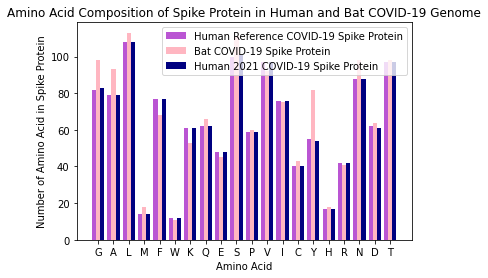

In [4]:
#Set how many amino acid groups there will be in the histogram -- 20
n_groups = 20

#Create the base of the bar chart
fig, ax = plt.subplots()

#Index is defined as the range of numbers between 1-20 and is used to pass in the frequencies of the amino acids
index = np.arange(n_groups)

#This sets the width of each bar in the bar chart
bar_width = 0.40

#The plt.bar function passes in the values of the variable humanrefspike_counts defined above through the range of indexes at 2/3 of the predefined bar_width. The color 'medium orchid' is used for this dataset and it is labeled.
plt.bar(index, humanrefspike_counts, (2/3)*bar_width,
color='mediumorchid',
label='Human Reference COVID-19 Spike Protein')

#The plt.bar function passes in the values of the variable batspike_counts defined above through the range of indexes at 2/3 of bar_width, offset by 2/3 of bar_width so that it is not overlapping with the other dataset, but appears right next to it with no gap. The color 'lightpink' is used for this dataset and it is labeled.
plt.bar(index + (2/3)*bar_width, batspike_counts, (2/3)*bar_width,
color='lightpink',
label='Bat COVID-19 Spike Protein')

#The plt.bar function passes in the values of the variable human2020spike_counts defined above through the range of indexes at 2/3 of bar_width, offset by 4/3 of bar_width so that it is not overlapping with the other datasets, but appears right next to them with no gap. The color 'navy' is used for this dataset and it is labeled.
plt.bar(index + (2/3)*bar_width+(2/3)*bar_width, human2021spike_counts, (2/3)*bar_width,
color='navy',
label='Human 2021 COVID-19 Spike Protein')

#The x-axis and y-axis are labeled
plt.xlabel('Amino Acid')
plt.ylabel('Number of Amino Acid in Spike Protein')

#The bar chart is given a title
plt.title('Amino Acid Composition of Spike Protein in Human and Bat COVID-19 Genome')

#Here, the x-axis tick values are labeled with the amino acid corresponding to the data at the middle of the two bars
plt.xticks(index + 2*bar_width/3, x)

#Places the legend
plt.legend()

#Shows the plot
plt.show()

### Part 4: Analysis of the results

The sequence alignment above shows the sequence alignment score for the two compared groups: first, the reference SARS-CoV-2 spike protein genome vs. the bat spike protein genome; second, the reference SARS-CoV-2 spike protein genome vs. the most recently sequenced spike protein genome (at the time this project was completed).  The Spike protein was the analyzed protein from the SARS-CoV-2 genome, chosen for its importance in the viral function. The scores and visual density of the vertical lines from the sequence alignment indicated that there were more similarities between the reference SARS-CoV-2 spike protein genome and the most SARS-CoV-2 human spike protein genome. This was in alignment with my hypothesis. From here, I determined whether there was a drastic difference in the Spike protein between the strains. The bar chart above shows the number of each amino acid in the Spike protein on one set of axes for easy comparison. This visually showed that although there were differences between the number of amino acids that the protein was composed of, overall they were still of a very similar composition. This aligned with my hypothesis because the protein composition is still very similar for all three even though the bat spike genome isn't as similar to the human reference SARS-CoV-2 genome.

### Works Cited

Saha P, Banerjee AK, Tripathi PP, Srivastava AK, Ray U. A virus that has gone viral: amino acid mutation in S protein of Indian isolate of Coronavirus COVID-19 might impact receptor binding, and thus, infectivity. Biosci Rep. 2020 May 29;40(5):BSR20201312. doi: 10.1042/BSR20201312. PMID: 32378705; PMCID: PMC7225408.

Xia, S., Liu, M., Wang, C. et al. Inhibition of SARS-CoV-2 (previously 2019-nCoV) infection by a highly potent pan-coronavirus fusion inhibitor targeting its spike protein that harbors a high capacity to mediate membrane fusion. Cell Res 30, 343–355 (2020). https://doi.org/10.1038/s41422-020-0305-x
